GitHub: https://github.com/MYUSER/MYPROJECT/

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [ ]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

Run the following cell to load the packages you will need.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [3]:
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)

Now, let's split the data into training and test sets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [46]:
# START YOUR CODE HERE

model = Sequential()
model.add(Dense(12, input_dim=512, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

Now, let's start our training.

In [47]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
60/60 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7025
Epoch 2/20
60/60 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8544
Epoch 3/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9511
Epoch 4/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0912 - accuracy: 0.9835
Epoch 5/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9935
Epoch 6/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9984
Epoch 7/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9992
Epoch 8/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9997
Epoch 9/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9997
Epoch 10/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9997
Epoch 11/20
60/60 [

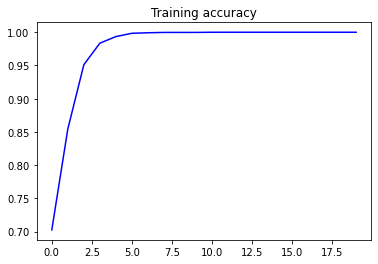

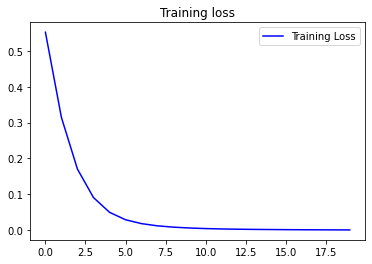

In [48]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set and report Precision, Recall, F1-Score, and Accuracy.

Before calculating various metrics we need to get the predictions from the model for each observation in the test set.

In [49]:
# START YOUR CODE HERE
preds = (model.predict(X_test) > 0.5).astype("int32")

Now we have the predictions for each observatrion we can pass them to the classification report function from sklearn. This conveniently calculates the required metrics.

In [55]:
print(classification_report(y_test, preds, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9717    0.9856       247
           1     0.9839    1.0000    0.9919       428

    accuracy                         0.9896       675
   macro avg     0.9920    0.9858    0.9888       675
weighted avg     0.9898    0.9896    0.9896       675



# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

